In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Input parameters
START_PRICE  = 200    # Starting price
STEP_PRICE   = 200     # Price to increase in each row
END_PRICE    = 200000  # Price at the end of the table

In [3]:
def fastwork_commission(price):
    # Tier 1
    tier1 = min(price,10000) * 0.17
    # Tier 2
    tier2 = min(max(0,price-10000) * 0.12,4800)
    # Tier 3
    tier3 = max(0,price-50000) * 0.07
    
    return tier1+tier2+tier3

In [30]:
df = pd.DataFrame(range(START_PRICE,END_PRICE,STEP_PRICE),columns=['Price'])

In [31]:
df['Fastwork_Commission_Fee'] = df['Price'].apply(fastwork_commission)
df['Fee_Proportion'] = df['Fastwork_Commission_Fee'] / df['Price']

In [43]:
STEP_IN_GRAPH = 5000

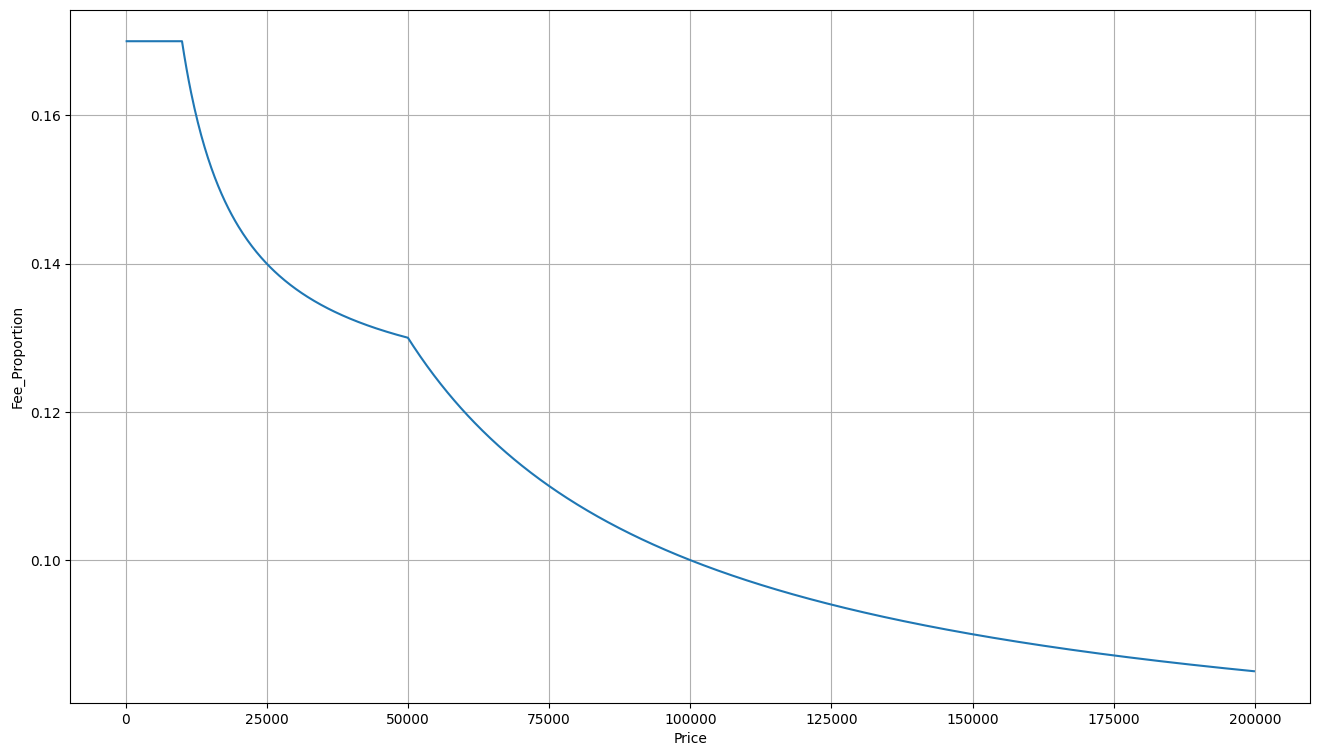

In [52]:
plt.figure(figsize=(16, 9))
ax = sns.lineplot(data=df,x="Price", y="Fee_Proportion")
ax.tick_params(axis='both',which='both')
ax.grid(visible=True,which='both')

In [ ]:
plt.savefig("Commission_Proportion.png")